# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv')
df.drop_duplicates().shape

(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df.loc[df['APGAR5'] <= 3, 'apgar_cat'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5),  'apgar_cat'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7),  'apgar_cat'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'apgar_cat'] = 'normal'


In [4]:
df['apgar_cat'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: apgar_cat, dtype: int64

In [5]:
df['GESTACAO'].sort_values()

8732     22 a 27 semanas
19727    22 a 27 semanas
19728    22 a 27 semanas
5800     22 a 27 semanas
22119    22 a 27 semanas
              ...       
26782                NaN
26786                NaN
26788                NaN
26800                NaN
26855                NaN
Name: GESTACAO, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

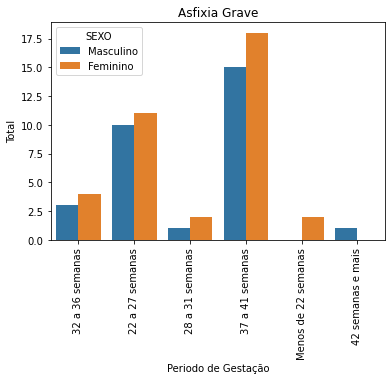

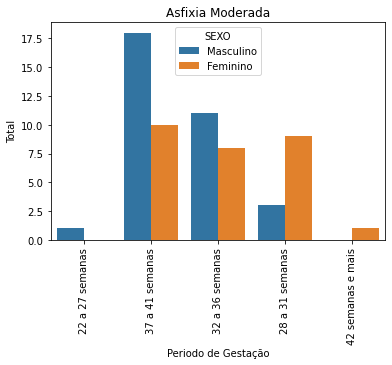

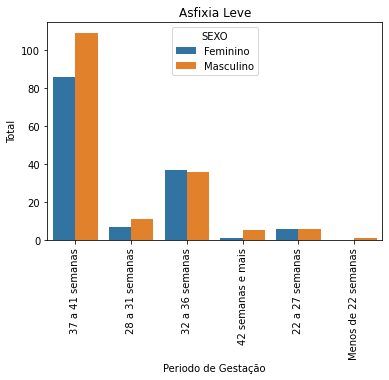

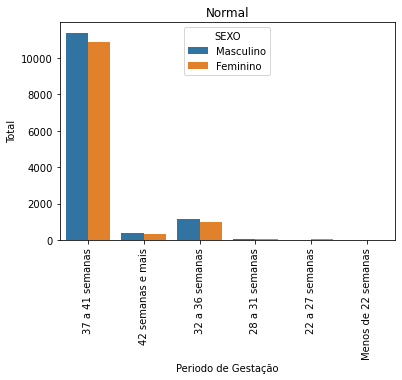

In [6]:
categorias = ['asfixia grave','asfixia moderada','asfixia leve','normal']

for cat in categorias:

    fig = plt.figure(); ax = fig.add_subplot(1,1,1)
    
    sns.countplot(data = df.loc[df['apgar_cat'] == cat], x = 'GESTACAO',hue ='SEXO' )
    ax.set(title=cat.title(), xlabel= 'Periodo de Gestação', ylabel='Total')
    
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)



####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
freq = pd.crosstab(df['GESTACAO'],df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
freq_pctlin = freq.div(freq.sum(axis = 1 ), axis = 0)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [9]:
list(freq_pctlin.index)

['22 a 27 semanas',
 '28 a 31 semanas',
 '32 a 36 semanas',
 '37 a 41 semanas',
 '42 semanas e mais',
 'Menos de 22 semanas']

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='APGAR5'>

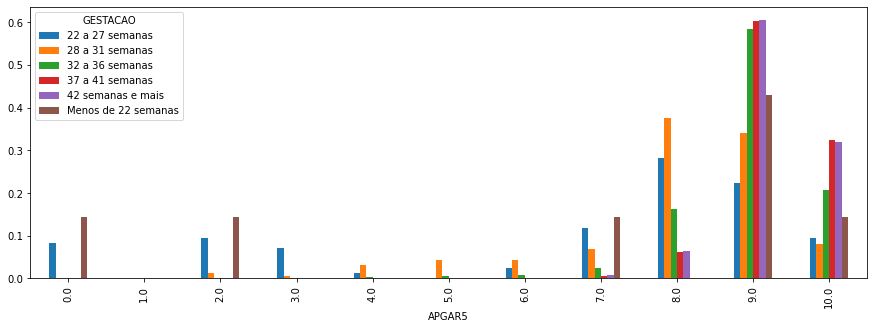

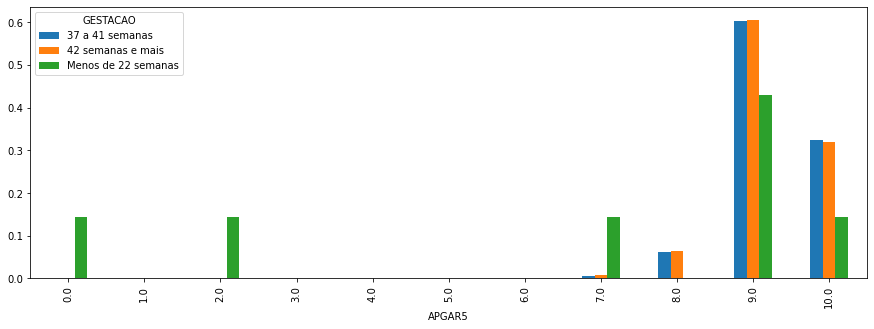

In [15]:
freq_pctlin.transpose().plot.bar(figsize=(15,5))
freq_pctlin[3:].transpose().plot.bar(figsize=(15,5))

# Podemos notar que nenhum dos nascimentos superior a 37 semanas hoveram indice de apgar - grave, 
# este indice se reserva apenas para os nascimentos classificados como prematuros. 
# A afirmação, está correta. 


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [10]:
# Sociedade Brasileira de Pediatria, que um recém-nascido tenha entre 2,5kg e 3,9kg.

peso = df[['PESO','APGAR5']]
peso.dropna(inplace=True)
peso.loc[peso['PESO'] < 2500,'class'] = 'Abaixo'
peso.loc[(peso['PESO'] >= 2500) & (peso['PESO'] <= 3900 ),'class'] = 'Normal'
peso.loc[peso['PESO'] > 3900,'class'] = 'Acima'
x2 = peso.loc[peso['APGAR5'] < 5]

peso

C:\Users\gabrielhxcx\AppData\Local\Temp\ipykernel_14652\1922796826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peso.dropna(inplace=True)
C:\Users\gabrielhxcx\AppData\Local\Temp\ipykernel_14652\1922796826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peso.loc[peso['PESO'] < 2500,'class'] = 'Abaixo'


,PESO,APGAR5,class
0,3685,10.0,Normal
1,3055,9.0,Normal
2,3460,10.0,Normal
3,2982,10.0,Normal
4,3310,10.0,Normal
...,...,...,...
27023,2110,9.0,Abaixo
27024,3310,9.0,Normal
27025,3065,10.0,Normal
27026,2352,9.0,Abaixo


<AxesSubplot:xlabel='PESO', ylabel='Count'>

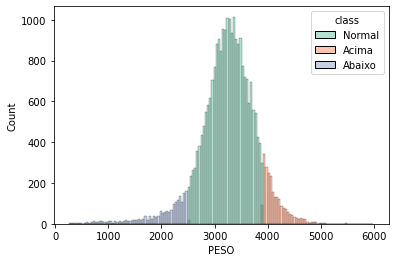

In [73]:
sns.histplot(data= peso, x= 'PESO',hue='class',palette ="Set2")


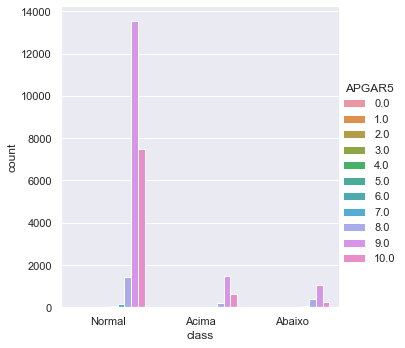

In [129]:
sns.catplot(data = peso, x = 'class',hue= 'APGAR5',kind='count' )
